In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
rng = np.random.default_rng(1729)

# Match Portion

In [2]:
# 5 3 1 1 4 2 5 2 1 3

Imagine this: you wrap up your last final exam for the semester and you're ready to play the video game you've been wanting to play for a while. You sit down at your computer, start the game, join a lobby, and wait. And wait some more. You start getting frustrated. How long are you going to have to keep waiting? That's what this researh hopes to address.

For the purposes of this experience, we'll assume that, to begin a game, a team must first have 5 players. Another assumption is that players will join with varying group sizes. For example, there may be solo players, duos with 2 players, or even a whole party of 5 ready to go. This means that when making our team of 5, it could consist of all solo players, a duo and a trio, a party of 4 and a solo player, etc. These varying party sizes will influence how we optomize pairing players to make a team of 5. The distribution of party sizes will be altered, as well as the frequency of the arrivals.

## The Matching Method

In this approach, we will seek to match every incoming party with their complement. For example, 2's are matched with 3's, 4's are matched with 1's, and 5's go right ahead. Here's an example of how we would group 10 parties who join the Queue:

In [3]:
# Queue: 5 3 1 1 4 2 5 2 1 3

# The 5 is matched and ready to go
# Teams: [5]
# Queue 3 1 1 4 2 5 2 1 3

# The 3 has no complements waiting so it's put in a line with other trios waiting to be matched
# Teams: [5]
# Lines: [3]
# Queue: 1 1 4 2 5 2 1 3

# The 1 has no complements waiting so it's put in a line with other solos waiting to be matched
# Teams: [5]
# Lines: [3] [1]
# Queue: 1 4 2 5 2 1 3

# The 1 still has no complements, repeat above
# Teams: [5]
# Lines: [3] [1, 1]
# Queue: 4 2 5 2 1 3

# The 4 has a complement, a 1, waiting in line so it's paired up with it and sent to another team
# Teams: [5] [4,1]
# Lines: [3] [1]
# Queue: 2 5 2 1 3

In [4]:
# Function for grouping parties of X with parties of 5-X
# Returns a list of all average wait times and
# a dataframe of all party size amounts that were left unmatched

def CreatePartyMatch(arrivals,sizes):
    c_arr = np.cumsum(arrivals)
    df = pd.DataFrame({'Arrival Time': c_arr, 'Party Size': sizes, 'Time Passed':arrivals})

    waits = []
    weights = []
    matches = []
    parties = []
    for i in range(4):
        matches.append([])
    
    for i in range(len(arrivals)):
        val = df.iloc[i]
        party = int(val[1])
        time = val[0]

        # if the party size is 5, add zero to average wait times
        if party == 5:
            waits.append(0)
            weights.append(0)
            parties.append(5)
            continue
        
        # Party of X's party of (5-X):
        complement = matches[4 - party]

        # Party of X doesn't have a match, keep it waiting with other partys of X
        if complement == []:
            matches[party-1].append(val)
        # Party of X found a party of (5-X), remove the first one waiting
        else:
            temp = complement.pop()
            waits.append((time - temp[0])/2)
            weights.append((time - temp[0])*temp[1]/5)
            parties.append([temp[1],val[1]])
    leftovers = []
    for m in matches:
        leftovers.append(len(m))
    dfl = pd.DataFrame({'Party Size':[1,2,3,4],'leftover amount':leftovers})

    return waits,weights,dfl,parties


### Match Test with set 10 parties

In [5]:
arrivals = rng.uniform(0,5, size=10)
sizes = [5, 3, 1, 1, 4, 2, 5, 2, 1, 3]

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

for p in parties:
    print(p)
for i in range(4):
    print((i+1),":",dfl['leftover amount'][i])

5
[np.float64(1.0), np.float64(4.0)]
[np.float64(3.0), np.float64(2.0)]
5
[np.float64(2.0), np.float64(3.0)]
1 : 2
2 : 0
3 : 0
4 : 0


### Match test when N = 1000, Uniform by Party

[[np.float64(2.0), np.float64(3.0)], 5, [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], 5, [np.float64(1.0), np.float64(4.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], 5, 5, 5, [np.float64(4.0), np.float64(1.0)], 5, [np.float64(4.0), np.float64(1.0)], 5, 5, [np.float64(4.0), np.float64(1.0)], 5, [np.float64(4.0), np.float64(1.0)], 5, 5, [np.float64(3.0), np.float64(2.0)], [np.float64(3.0), np.float64(2.0)], 5, [np.float64(3.0), np.float64(2.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(3.0), np.float6

count    582.000000
mean      19.880405
std       64.447764
min        0.000000
25%        0.000000
50%        1.909161
75%        8.347906
max      604.478569
dtype: float64

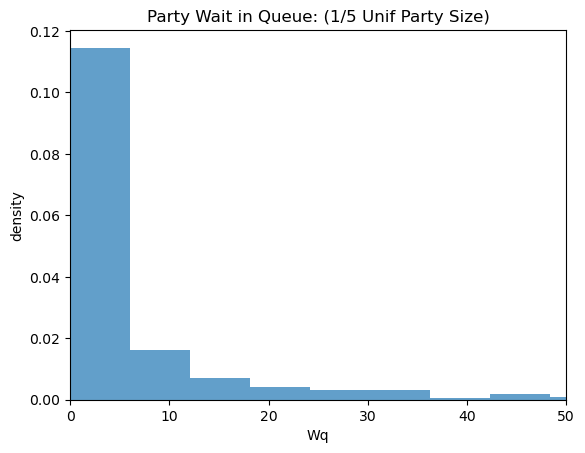

In [6]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = np.random.randint(1, 6, size=N)

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Party Wait in Queue: (1/5 Unif Party Size)")
plt.xlim(0, 50)

print(parties)
s = pd.Series(avg_waits)
s.describe()

### Repeated N=1000 Uniform Match Trials by Party

Text(0.5, 1.0, 'Mean wait times for N = 1000')

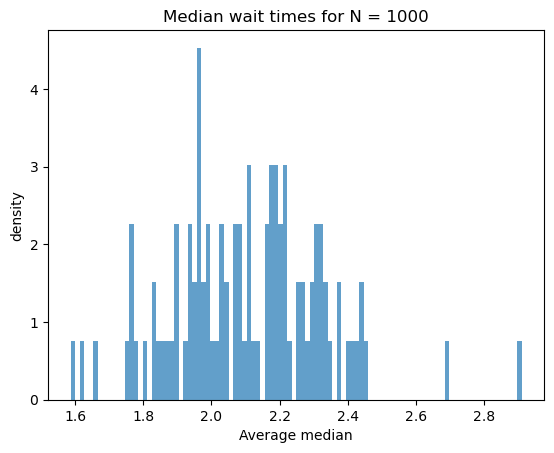

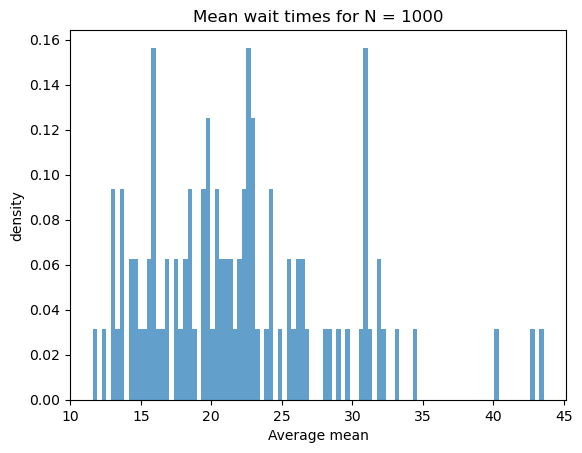

In [7]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = np.random.randint(1, 6, size=N)

    avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

    s = pd.Series(avg_waits)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

### Match Test when N = 1000 Uniform by Individual

[[np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, 5, [np.float64(4.0), np.float64(1.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(2.0), np.float64(3.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], 5, [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(4.0), np.float64(1.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(1.0), np.float64(4.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(1.0), np.float64(4.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, 5, 5, [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(2.0), np.float64(3.0)], 5, [np.float64(1.0), np.float64(4

count    580.000000
mean      15.580699
std       64.861826
min        0.000000
25%        0.000000
50%        1.178584
75%        6.644527
max      797.542874
dtype: float64

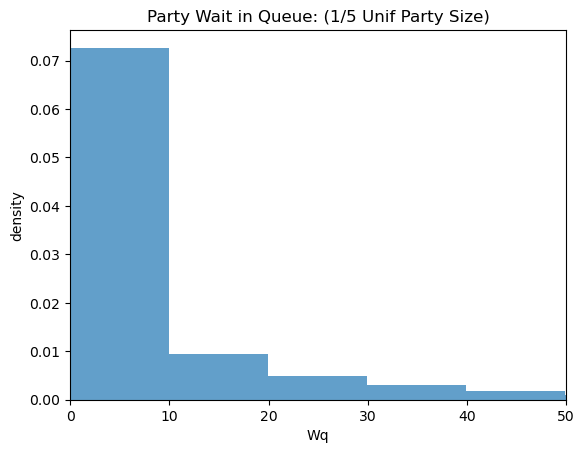

In [8]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = np.random.randint(1, 6, size=N)

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Party Wait in Queue: (1/5 Unif Party Size)")
plt.xlim(0, 50)

print(parties)
s = pd.Series(weight)
s.describe()

### Repeated N=1000 Uniform Match Trials by Individual

Text(0.5, 1.0, 'Mean wait times for N = 1000')

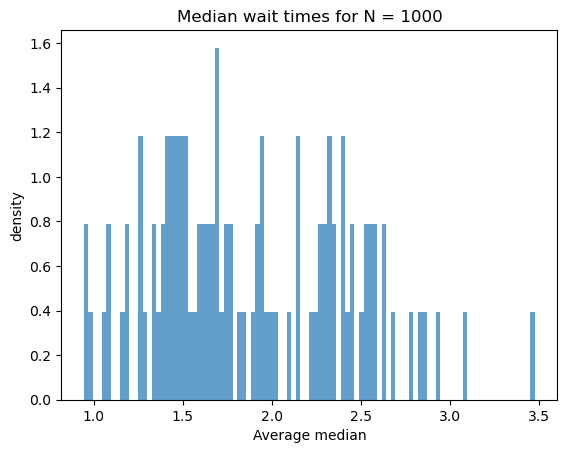

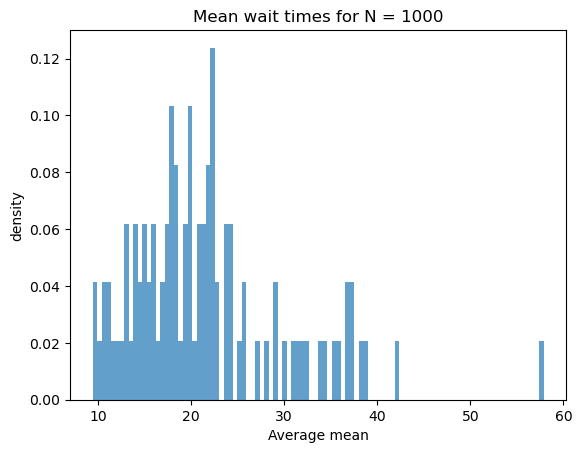

In [9]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = np.random.randint(1, 6, size=N)

    avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

    s = pd.Series(weight)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")